## Data Validation

### Observation

Upon conducting data validation, the dataset was refined from its initial size of 15,000 observations and 8 features to 14,998 observations and 8 features. The validation process involved comparing the dataset with a provided data table to ensure accuracy and consistency. It is worth noting that the revenue variable has 1,074 missing values out of the 15,000 observations in the dataset. 
The examination of individual features led to the following observations:

- Week: The week feature contained 6 distinct numeric values, aligning with the data information brief. No further data cleaning or adjustments were required.

- Sales Method: It was noted that the sales method feature had 5 unique values instead of the expected 3. This discrepancy was investigated and found to be due to inconsistencies in the naming convention. To address this issue, a standardized naming convention was implemented. The data type remained as described, but it was later converted to categorical for improved analysis efficiency.The 'sales_method' column exhibited inconsistencies in naming conventions, including entries like 'Email', 'Email + Call', 'Call', 'em + call', and 'email'. To ensure accuracy and consistency, the naming convention  was standardised by renaming entries like 'email' to 'Email' and 'em + call' to 'Email + Call'. This step aimed to prevent potential errors arising from inconsistent naming conventions.

- Customer ID: With 15,000 unique numeric values, the customer ID feature matched the information provided and did not require any cleaning or modifications.

- Number of Items Sold (nb_sold): The nb_sold feature exhibited 10 unique numeric values, and no additional cleaning was necessary.

- Years as a Customer: Initially, there were 42 unique values instead of the expected 40, indicating potential data entry errors for two observations. Two observations were identified in the dataset where the 'years_as_customer' values were greater than the year the company was established (1984). To maintain the integrity of the dataset and avoid biases,  these outliers were removed as they had no significant impact on the overall dataset structure.

- Number of Site Visits (nb_site_visits): The nb_site_visits feature contained 27 unique numeric values, and no data cleaning was required as it matched the data information brief.

- State: The state feature presented 50 unique values, and no missing values were found. The data type was consistent with the provided information, and no further cleaning was needed.

- Revenue: The 'revenue' column contained approximately 7.2% missing values, equivalent to 1074 entries. The missing values exceeded the 5% threshold set in this case, making their removal impractical.  A thorough investigation was conducted to understand the reason behind these missing values, particularly since the number of items sold feature had no missing values.
  Although the dataset did not provide specific explanations for the missing revenue values, it was decided that removing the observations with missing revenue exceeded the 5% threshold and could lead to a loss of statistical power and potential biases. To maintain statistical power and avoid biases resulting from a significant data loss, missing revenue values were imputed using the median values for the corresponding state of each missing entry. 
 
To summarise, the data validation process unveiled inconsistencies in the sales method naming convention and missing values in the revenue feature. These issues were addressed by implementing a standardized naming convention and imputing missing revenue values using state-specific medians. The other features required no further cleaning or adjustments, ensuring the dataset's integrity for subsequent analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from scipy import stats

In [2]:
data = pd.read_csv('product_sales.csv')
df = data.copy()
#view data
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
#view shape of the data
df.shape

(15000, 8)

In [4]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
#check for missing values
df.isnull().any()
df.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [6]:
#check the number of unique values of each column
col_values = {}
_columns = df.columns
for col in _columns:  
   col_values[col] = len(df[col].unique())
col_values

{'week': 6,
 'sales_method': 5,
 'customer_id': 15000,
 'nb_sold': 10,
 'revenue': 6744,
 'years_as_customer': 42,
 'nb_site_visits': 27,
 'state': 50}

In [7]:
##validating the number of years as a customer column 
current_year = datetime.date.today().year
year_founded = 1984

total_yr_establishment = current_year - year_founded + 1
df.drop(df[df['years_as_customer'] > total_yr_establishment].index, inplace=True)
df.shape

(14998, 8)

In [8]:
#replace 'em + call' with 'Email + Call' and 'email with 'Email'  
df['sales_method'] = df['sales_method'].str.replace('em \+ call','Email + Call')
df['sales_method'] = df['sales_method'].str.replace('email', 'Email')

#check for duplicate rows
print(f'Duplicates:{df.duplicated().any()}')

#check result
print(df['sales_method'].value_counts())

##convert sales_method to category data type to optimise memory usage
df.sales_method = df.sales_method.astype('category')
df.sales_method.dtype

Duplicates:False
Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64


CategoricalDtype(categories=['Call', 'Email', 'Email + Call'], ordered=False)

In [9]:
##replace the missing values in revenue with the median value of the corresponding state
df_median = df.groupby('state')['revenue'].median()
df['revenue'].fillna(df['state'].map(df_median), inplace=True)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

## Exploratory Data Analysis

### Observation

This report summarizes the key features of the statistics obtained from the provided dataset. The dataset consists of 14,998 observations for variables such as week, nb_sold, revenue, years_as_customer, and nb_site_visits. Here are the key findings:

- Weeks: The average duration of time captured in the dataset is approximately 3.1 weeks, with a standard deviation of 1.7 weeks. The minimum and maximum values represent the shortest and longest durations recorded, respectively.

- Number of Items Sold: On average, around 10 items were sold during the observed periods. The standard deviation of 1.8 indicates a moderate level of variability in sales. The range of values shows the minimum and maximum number of items sold.

- Revenue: The average revenue generated during the observed periods is approximately ``$93.63`, with a standard deviation of ``$45.72`. The minimum and maximum values represent the lowest and highest recorded revenues, respectively.

- Years as a Customer: On average, customers have been associated with the business for around 5 years. The standard deviation of 5.0 suggests considerable variability in the length of customer relationships. The range reveals the minimum and maximum number of years as a customer.

- Number of Site Visits: Customers, on average, made approximately 25 site visits during the observed periods. The standard deviation of 3.5 indicates a relatively low variability in site visit frequency. The range encompasses the minimum and maximum number of site visits recorded.

Overall, these statistics provide insights into the patterns and characteristics of the dataset. For example, the average revenue generated and the number of site visits indicate the typical engagement and purchasing behavior of customers. The range of values for each variable highlights the extent of variation observed within the dataset. These statistics provide insights into the characteristics of the dataset, such as sales patterns, customer engagement, and revenue generation.

In [10]:
#Summary statistics
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,14998.00000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.09828,10.084678,93.626893,4.959261,24.990799
std,1.65649,1.812334,45.723462,5.011237,3.501100
min,1.00000,7.000000,32.540000,0.000000,12.000000
25%,2.00000,9.000000,53.042500,1.000000,23.000000
50%,3.00000,10.000000,89.325000,3.000000,25.000000
75%,5.00000,11.000000,106.070000,7.000000,27.000000
max,6.00000,16.000000,238.320000,39.000000,41.000000


### Observation
**This shows the number of customers that were there for each approach**

Based on the provided data and the accompanying bar chart depicting the utilisation of different sales methods, we can see the number of customers were contacted using each approach. The customer base was categorized into three distinct groups: Email, Call, and Email + Call.

Among the total number of customers (14998), it was observed that approximately 49.77% (7465) were approached using the Email method, while 33.08% (4961) opted for the Call method. The remaining 17.15% (2572) of customers chose the Email + Call approach.

These findings indicate that the Email method was the most commonly employed strategy for customer outreach, exhibiting a difference in proportion of approximately 16.69% compared to the Call method and 32.62% compared to the Email + Call method.


Text(0.5, 1.0, 'Frequency of Sales Methods')

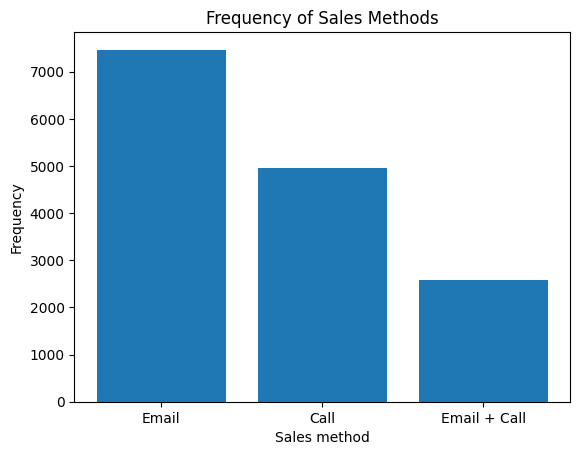

In [11]:
counts = df['sales_method'].value_counts()
plt.bar(counts.index,counts.values)
plt.xlabel('Sales method')
plt.ylabel('Frequency')
plt.title('Frequency of Sales Methods')


### Observation
**This shows the spread of the revenue overall and  for each method**

The distribution of revenue exhibits a positive skewness, indicating that the majority of revenue values are concentrated towards the lower end. Approximately 75% of the revenue values in the dataset are below 106.1, suggesting a substantial portion of lower revenue observations.

Furthermore, the standard deviation of 45.72 and a range of 205.78 highlight significant variability in revenue across the dataset. These variations can be attributed to disparities in product types and pricing strategies employed by the company.

- The presence of a wide spread and skewed distribution of revenue implies that revenue is not uniformly distributed. It is likely that there are notable disparities in revenue between different products or sales approaches, further emphasizing the need for in-depth analysis and understanding of the underlying factors contributing to revenue generation.

- The provided box plot and histogram reveal the distribution of revenue across different sales approaches. The Email + Call approach exhibits the highest median revenue of `$182.14`, followed by Email with `$94.34` and Call with `$49.93`. The range of revenue is the widest for Email + Call, ranging from `$85.17` to `$238.32`. These findings suggest that Email + Call may be more effective in generating revenue compared to Email or Call alone. However, other factors such as costs and customer demographics should also be considered when making business decisions.

Text(0.5, 1.0, 'Distribution of Revenue')

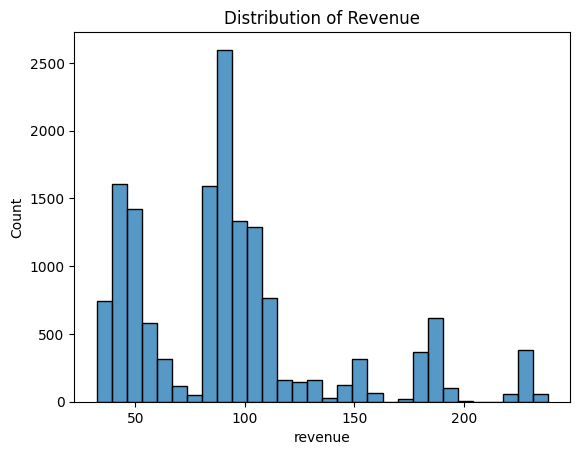

In [12]:
#Distribution of revenue
sns.histplot(df, x = 'revenue', bins=30)
plt.title('Distribution of Revenue')

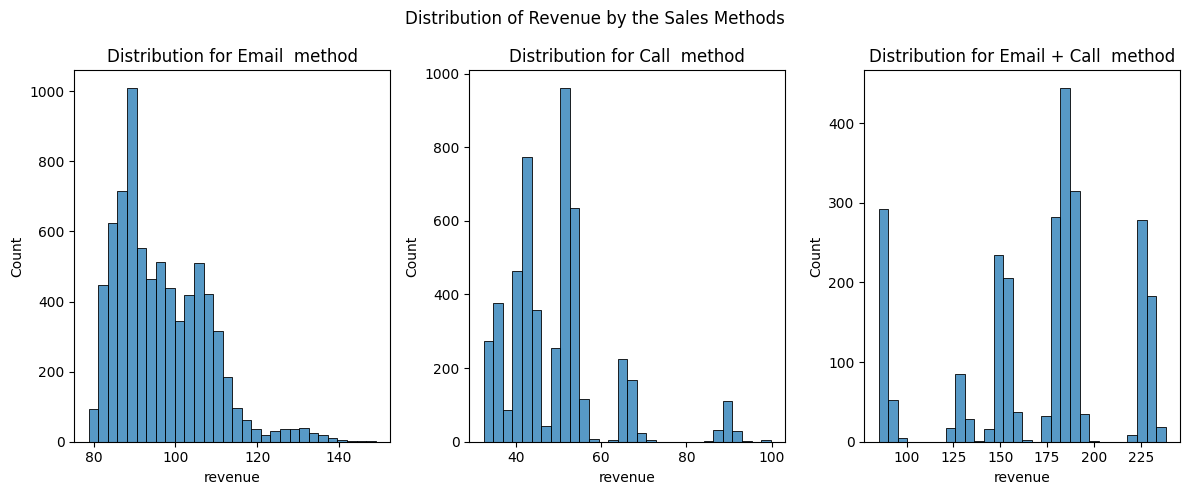

In [13]:
#Distribution of Revenue by sales mehtod
methods = ['Email', 'Call', 'Email + Call']
fig, ax = plt.subplots(ncols=3, figsize=(12,5))

for i, method in enumerate(methods):  
  sns.histplot(data= df[df['sales_method']==method], x='revenue', bins=30, ax= ax[i])
  ax[i].set_title(f'Distribution for {method}  method')
plt.suptitle('Distribution of Revenue by the Sales Methods')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Revenue by Sales Method')

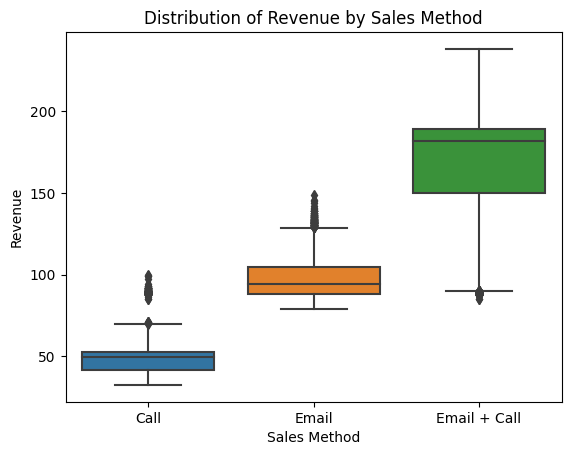

In [14]:
#Boxplot of Revenue by the Sales Methods
sns.boxplot(data=df, x='sales_method', y='revenue')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue by Sales Method')

### Observation
The quick overview of the relationships and distributions between variables, allowing for visual analysis of patterns, correlations, and potential outliers.

-The pairplot shows that their is a correlation between the number of items sold and the week
-It shows that revenue and the number of items sold have a strong relationsip. The number of site visits also follows a normal distribution

<Figure size 1200x500 with 0 Axes>

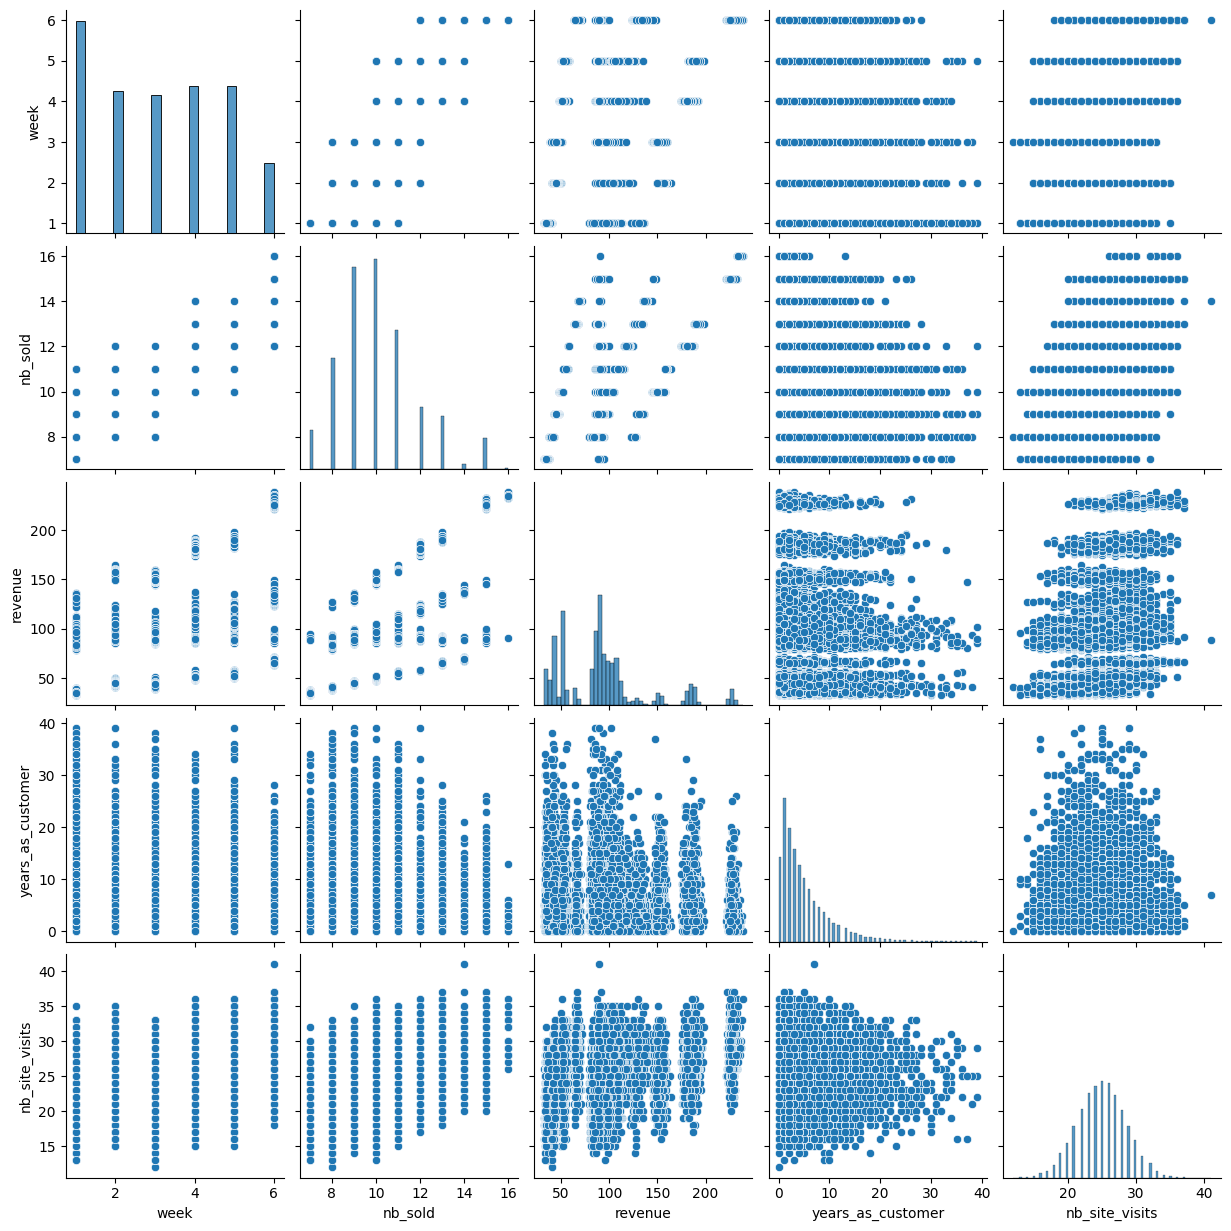

In [15]:
#Pairplot of the numerical variables

plt.figure(figsize=(12,5))
sns.pairplot(df)

### Observation
The correlation matrix shows the strength of the relationship between `sales`, `revenue`and other numerical variables in the dataset. The key findings are:

- The number of items sold has a strong positive correlation with the week, indicating that certain weeks have higher sales numbers. There is a moderately strong positive correlation between the number of items sold and revenue, suggesting that higher sales numbers are associated with higher revenue.

- The week has a moderate positive correlation with revenue, implying that certain weeks may generate higher revenue. The number of items sold has a moderate positive correlation with the number of site visits, suggesting that higher site visit numbers may lead to increased sales.

- The number of years as a customer has a weak negative correlation with the number of items sold, indicating that longer-standing customers may have slightly lower sales numbers.

<AxesSubplot: >

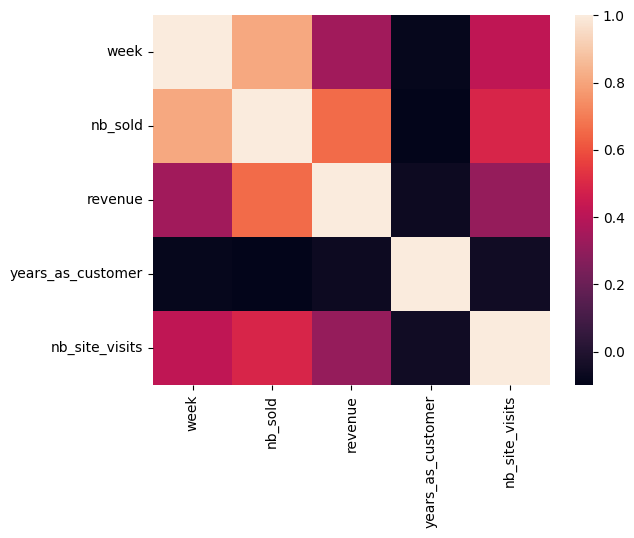

In [16]:
#correlation plot of the numerical variables
df.select_dtypes('number').corr()
sns.heatmap(df.select_dtypes('number').corr())

Text(0.5, 1.0, 'Average number of site visits')

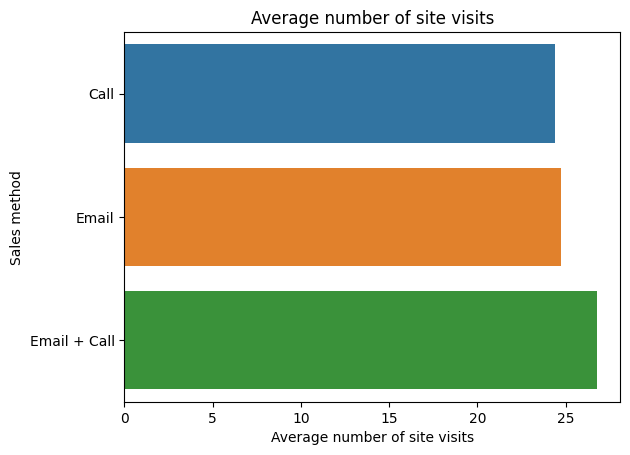

In [17]:
#Average number of site visits per sales method
avg_no_site_visits = df.groupby('sales_method').agg({'nb_site_visits':'mean'}).reset_index()
sns.barplot(y='sales_method', x='nb_site_visits', data=avg_no_site_visits, orient='horizontal')
plt.xlabel('Average number of site visits')
plt.ylabel('Sales method')
plt.title('Average number of site visits')

### Observation
**This shows the difference in revenue over time for each of the methods.**

The analysis reveals that the email method proved to be the best efficient in generating the high revenue while using the lest work-time. The call method, on the other hand, involved more work-time per customer and resulted in lower revenue compared to the email method. The email + call method forms an equilibrium, requiring a fair  amount of work-time but generating the highest average revenue for each week and total revenue over time. These findings can guide decision-making on the most effective sales method to employ at different stages of the product launch.

Examining the total revenue plot, it is evident that the email sales approach consistently outperformed other methods in the initial four weeks though there was a steady decline in revenue. The fifth week saw a dip below the revenue of the third week, followed by a sharp decline in the sixth week.

In contrast, the call sales approach demonstrated a steady upward trend in weekly revenue peaked at week 5 and had a sharp decline in week 6 to about same value as week 1.

Similarly, the email + call method followed a steady uptrend, generating the highest revenue in the week 5. However, it experienced a sharp decline in revenue during the sixth week.

Analyzing the average revenue per customer, the email + call method consistently yielded the highest average revenue, followed by the email and call methods. All the methods had the highest average revenu in week 6

<Figure size 640x480 with 0 Axes>

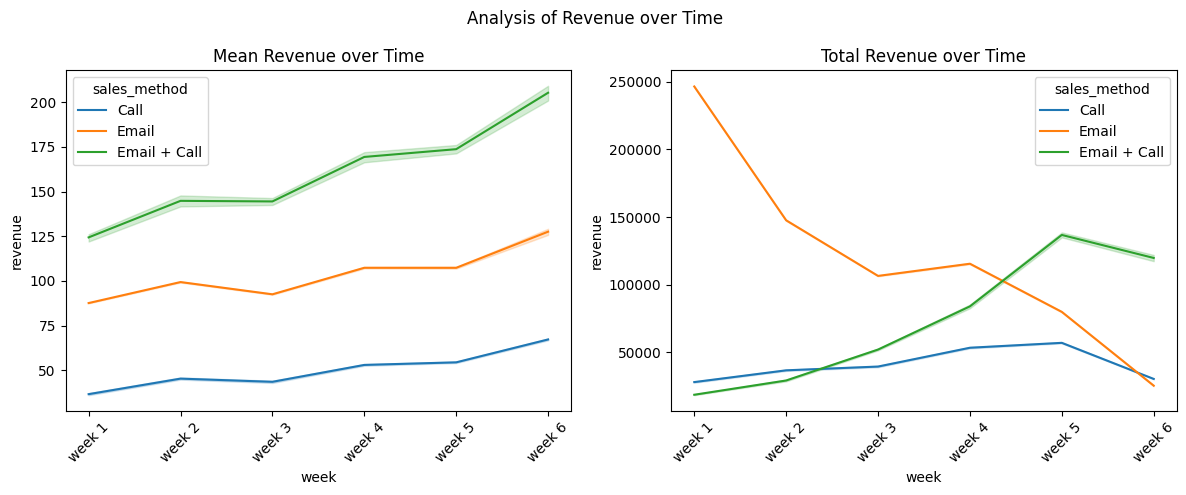

In [18]:
plt.figure()
fig, ax = plt.subplots(ncols = 2, figsize=(12,5))
week_labels = ['week 1', 'week 2', 'week 3', 'week 4', 'week 5', 'week 6']
sns.lineplot(x='week', y='revenue', data=df, estimator='mean', hue='sales_method', ax=ax[0])
sns.lineplot(x='week', y='revenue', data=df, estimator='sum', hue='sales_method', ax=ax[1])
plt.suptitle('Analysis of Revenue over Time')
ax[0].set_title('Mean Revenue over Time')
ax[1].set_title('Total Revenue over Time')
ax[0].set_xticklabels(week_labels, rotation=45)
ax[1].set_xticklabels(week_labels, rotation=45)
ax[0].set_xticks(range(1, 7))
ax[1].set_xticks(range(1, 7))
plt.tight_layout()
plt.show()

### Observation
- The `Email` method clearly drove total sales and revenue up through week 1 and 4 with the `Call`  and Email + Call method driving sales in the 5th and 6th week respectively.  The `Email + Call` method had the highest total revenue for week 5 and 6. This metric is particularly useful for assessing the total revenue contribution, tracking growth trends, and evaluating the overall financial health of the business..

- However, when considering the average sales and revenue per customer, the `Email + Call` method is clearly the leader.This metric is valuable for evaluating customer value, identifying opportunities for upselling or cross-selling, and optimizing pricing strategies. 

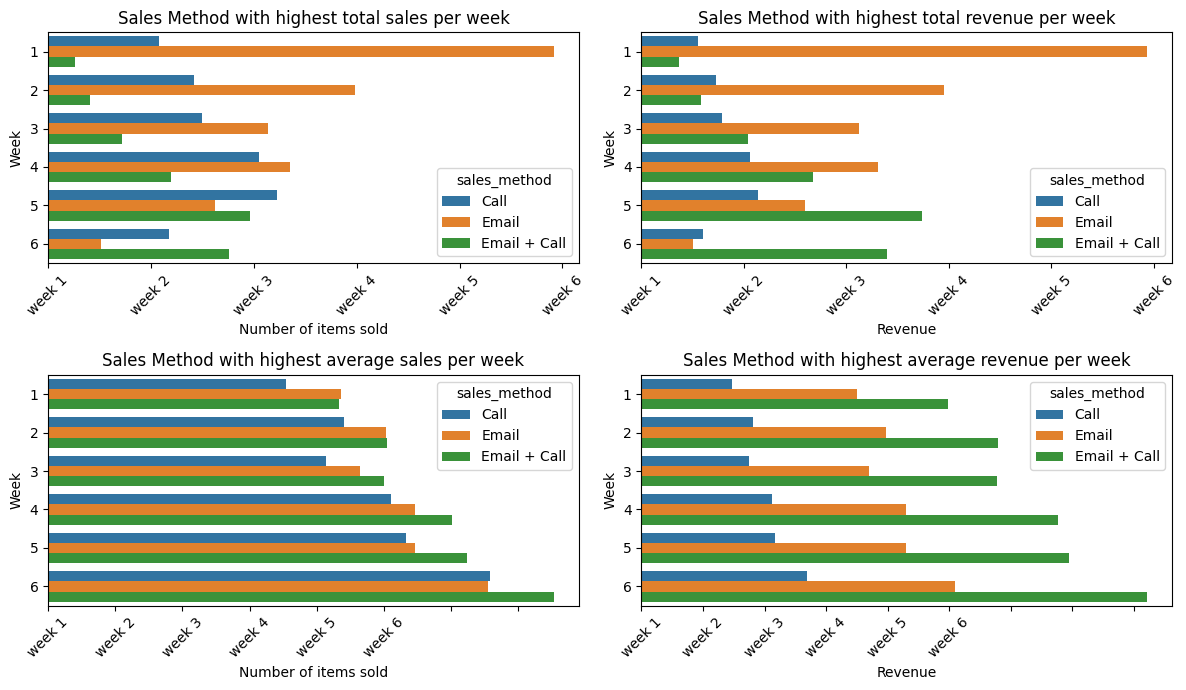

In [19]:
#Sales method with the revenue and sales
sales_per_week = df.groupby(['week', 'sales_method']).agg({'nb_sold': 'sum', 'revenue': 'sum'}).reset_index()
avg_sales_per_week = df.groupby(['week', 'sales_method']).agg({'nb_sold': 'mean', 'revenue': 'mean'}).reset_index()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
sns.barplot(y='week', x='nb_sold', hue='sales_method', data=sales_per_week, ax=ax[0,0], orient='horizontal')
sns.barplot(y='week', x='revenue', hue='sales_method', data=sales_per_week, ax=ax[0,1], orient='horizontal')
sns.barplot(y='week', x='nb_sold', hue='sales_method', data=avg_sales_per_week, ax=ax[1,0], orient='horizontal')
sns.barplot(y='week', x='revenue', hue='sales_method', data=avg_sales_per_week, ax=ax[1,1], orient='horizontal')

#Barplot of Sales Method with highest sales per Week
ax[0,0].set_title('Sales Method with highest total sales per week')
ax[0,0].set_ylabel('Week')
ax[0,0].set_xticklabels(week_labels, rotation=45)
ax[0,0].set_xlabel('Number of items sold')

#Barplot for Sales Method with Most Revenue per Week
ax[0,1].set_title('Sales Method with highest total revenue per week')
ax[0,1].set_ylabel('Week')
ax[0,1].set_xticklabels(week_labels, rotation=45)
ax[0,1].set_xlabel('Revenue')


ax[1,0].set_title('Sales Method with highest average sales per week')
ax[1,0].set_ylabel('Week')
ax[1,0].set_xticklabels(week_labels, rotation=45)
ax[1,0].set_xlabel('Number of items sold')

ax[1,1].set_title('Sales Method with highest average revenue per week')
ax[1,1].set_ylabel('Week')
ax[1,1].set_xticklabels(week_labels, rotation=45)
ax[1,1].set_xlabel('Revenue')
plt.tight_layout()
plt.show()

### Observation -Customer segmentation

- California, Texas, New York,Florida and Illinois are consistently the top five states across total sales, revenue, numner of site visits and years as customer. The top ten states remain fairly same throughout.

- California, Texas, New York,Florida and Illinois consistently demonstrate strong performance across all three sales approaches consistently ranking within the top five. The states ranking in the 6th to 10th positions vary depending on the sales approach employed. For the email method, the states in order are Pennsylvania, Ohio, Michigan, Georgia, and North Carolina. In the call approach, New Jersey replaces Michigan in the 7th position. In the Email + Call approach, Washington enters the top 10, while Michigan returns to the 7th position. These patterns can be influenced by factors such as customer preferences, regional economic conditions, and competition. Therefore, it is essential for the sales team to focus on maintaining and improving their performance in these states, as they represent critical markets for the company.

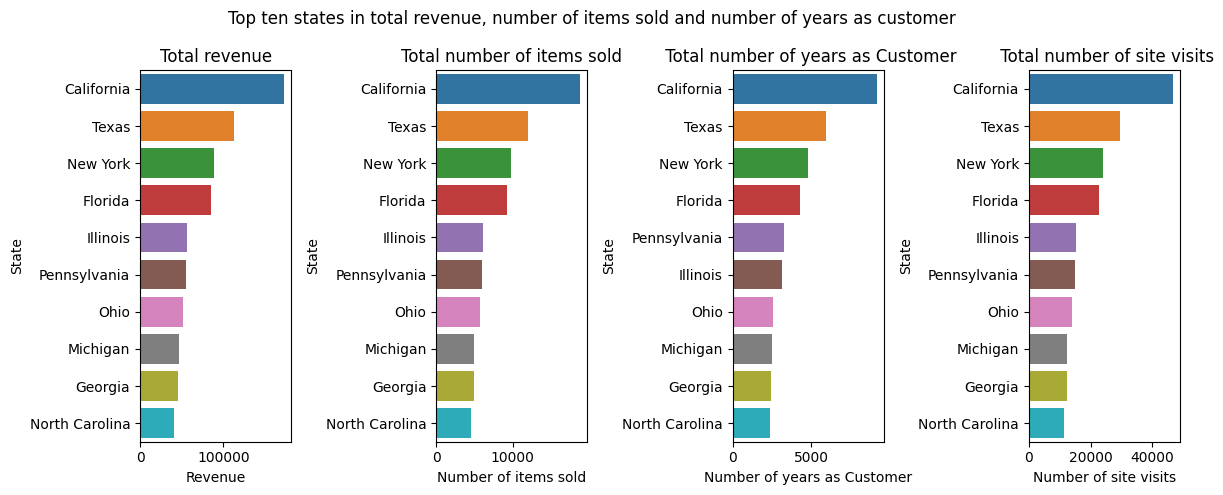

In [20]:
#Customer segmentation
state_segment = df.groupby(['state']).agg({'revenue':'sum', 'nb_sold':'sum', 'years_as_customer':'sum','nb_site_visits':'sum'}).reset_index()

top_ten_states_tot_rev = state_segment.sort_values('revenue', ascending=False)[:10]
top_ten_states_tot_nb_sold = state_segment.sort_values('nb_sold', ascending=False)[:10]
top_ten_states_avg_years_as_customer = state_segment.sort_values('years_as_customer', ascending=False)[:10]
top_ten_states_no_site_visits = state_segment.sort_values('nb_site_visits', ascending=False)[:10]


#bar plot comparing revenue for each sales method within state
fig, ax = plt.subplots(ncols = 4, figsize=(12,5))
sns.barplot(y='state', x='revenue', data=top_ten_states_tot_rev, orient = 'horizontal', ci=None, ax=ax[0])
sns.barplot(y='state', x='nb_sold', data=top_ten_states_tot_nb_sold, orient = 'horizontal', ci=None, ax=ax[1])
sns.barplot(y='state', x='years_as_customer', data=top_ten_states_avg_years_as_customer, orient = 'horizontal', ci=None, ax=ax[2])
sns.barplot(y='state', x='nb_site_visits', data=top_ten_states_no_site_visits, orient = 'horizontal', ci=None, ax=ax[3])

plt.suptitle('Top ten states in total revenue, number of items sold and number of years as customer ')
ax[0].set_title('Total revenue')
ax[1].set_title('Total number of items sold')
ax[2].set_title(' Total number of years as Customer')
ax[3].set_title(' Total number of site visits')

ax[0].set_ylabel('State')
ax[0].set_xlabel('Revenue')
ax[1].set_ylabel('State')
ax[1].set_xlabel('Number of items sold')
ax[2].set_ylabel('State')
ax[2].set_xlabel('Number of years as Customer')
ax[3].set_ylabel('State')
ax[3].set_xlabel('Number of site visits')
plt.tight_layout()
plt.show()

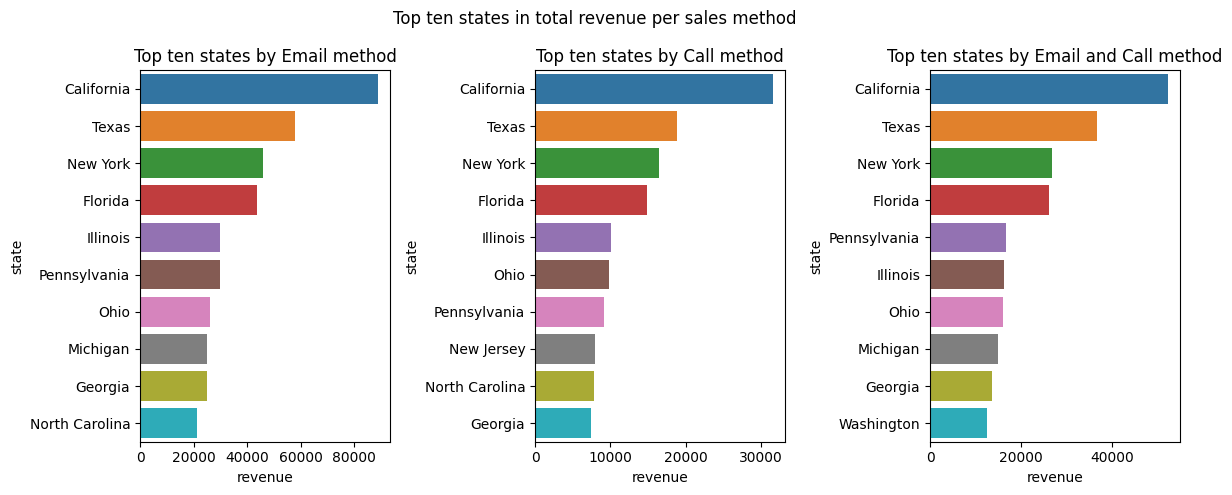

In [21]:
#Top 10 states in revenue per Sales Method
top_state_per_email = df[df['sales_method']=='Email'].groupby('state').agg({'revenue':'sum'}).sort_values('revenue', ascending=False).reset_index()[:10]
top_state_per_call = df[df['sales_method']=='Call'].groupby('state').agg({'revenue':'sum'}).sort_values('revenue', ascending=False).reset_index()[:10]
top_state_per_email_call = df[df['sales_method']=='Email + Call'].groupby('state').agg({'revenue':'sum'}).sort_values('revenue', ascending=False).reset_index()[:10]

fig, ax = plt.subplots(ncols=3,figsize=(12,5))
sns.barplot(x='revenue', y='state' ,data=top_state_per_email, ax=ax[0])
sns.barplot(x='revenue', y='state' ,data=top_state_per_call, ax=ax[1])
sns.barplot(x='revenue', y='state' ,data=top_state_per_email_call, ax=ax[2])

ax[0].set_title('Top ten states by Email method')
ax[1].set_title('Top ten states by Call method')
ax[2].set_title('Top ten states by Email and Call method')
plt.suptitle('Top ten states in total revenue per sales method')
plt.tight_layout()
plt.show()

### Observation - Business metrics

- Average Order Value (AOV): AOV calculates the average value of each customer's purchase or order. It helps businesses understand customer spending patterns and their potential for upselling or cross-selling. Analyzing AOV assists in optimizing pricing strategies, promotional activities, and maximizing revenue per customer. The results of the Average Order Value (AOV) analysis provide insights into how different sales methods impact the revenue generated by the business.

In [22]:
#Average order value Metric
AOV = df.groupby('sales_method')['revenue'].sum()/df.groupby('sales_method')['revenue'].count()
AOV_ = pd.DataFrame(AOV)
AOV_

,revenue
sales_method,
Call,49.131611
Email,96.577318
Email + Call,170.888233


## Recommendations:
The business metris recommended are the Sales Revenue and Average Order Value(AOV):

- Sales Revenue: Analyzing the revenue generated by the business is a fundamental metric to measure the financial performance and success of the business. It provides insights into the overall profitability and growth of the company. From the analysis it can be seen that California, Texas, New York,Florida and Illinois are the primary drivers of sales and revenue. The company should take advantage of the existing market in these states and maximise it.

- Average Order Value (AOV): 
    - The 'Email + Call' sales method has the highest AOV of $170.89. This suggests that customers who engage with the business through both email and call tend to make higher-value purchases on average. This finding indicates that a combined approach of email and call communication may be more effective in influencing customer behavior and driving higher revenue.

  - The 'Email' sales method has an AOV of $96.58, which is lower than the 'Email + Call' method but higher than the 'Call' method. This suggests that email communication alone can still generate moderate-value orders. However, compared to the 'Email + Call' method, the AOV is lower, indicating that the additional personal interaction provided by the call component may positively influence purchase decisions and result in higher-value orders.

  - The 'Call' sales method has the lowest AOV of $49.13. This indicates that customers who primarily engage with the business through phone calls tend to make lower-value purchases on average. This finding suggests that the call approach may be less effective in driving higher-value transactions compared to the other methods analyzed.

  - Based on these results, the business can make informed decisions regarding resource allocation and sales strategy. It may consider focusing more on the 'Email + Call' and 'Email' methods, as they have higher AOVs and show potential for generating greater revenue per order. Additionally, the findings highlight the importance of personalized communication and a multi-channel approach in driving higher-value purchases.


- Monitor conversion rates: Tracking and evaluating the conversion rates for each sales method is crucial. This entails measuring the percentage of potential customers contacted through each method who ultimately make a purchase. By closely monitoring conversion rates, the sales team can identify the most successful approach and make informed decisions about resource allocation and strategy refinement.

- Solicit customer feedback: Actively seek feedback from customers through surveys or interviews to gain a deeper understanding of their preferences, needs, and concerns. This feedback can shed light on the reasons behind the declining revenue observed in the email method. Incorporating customer input into sales strategies enables a more customer-centric approach and improves the chances of meeting customer expectations.

- Analyze communication content and scripts: Conduct a comprehensive analysis of the content and scripts used in email and call interactions. By examining the language, tone, and messaging, the sales team can gain insights into customer response patterns. Identifying effective communication strategies and tailoring them accordingly can enhance customer engagement and boost sales outcomes.

By implementing these recommendations, the sales team can enhance their performance, drive revenue growth, and foster stronger customer relationships. Regular evaluation, adaptation, and alignment with customer preferences will contribute to sustained success in the competitive sales landscape.